### Data Reading

In [1]:
import pandas as pd

# Read the data set
data1 = pd.read_csv("dataset1.csv", encoding="iso-8859-1")
data2 = pd.read_csv("dataset2.csv", encoding="iso-8859-1")
data3 = pd.read_csv("dataset3.csv", encoding="iso-8859-1")

# # Save the data set as a utf-8 encoded CSV file
# data1.to_csv("dataset1_utf8.csv", index=False, encoding="utf-8")
# data2.to_csv("dataset2_utf8.csv", index=False, encoding="utf-8")
# data3.to_csv("dataset3_utf8.csv", index=False, encoding="utf-8")

# Number of printed data points
print("Number of data 1 points:", len(data1))
print("Number of data 2 points:", len(data2))
print("Number of data 3 points:", len(data3))


Number of data 1 points: 5728
Number of data 2 points: 5937
Number of data 3 points: 2225


In [2]:
data1.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
data2.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [4]:
data3.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


#### Data Cleaning

In [5]:
#Information on data1 features 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
#Information on data2 features 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [7]:
#Information on data3 features 
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [8]:
#To remove the NA values
data1 = data1.dropna()
print("The total number of data1-points after removing the rows with missing values are:", len(data1))

The total number of data1-points after removing the rows with missing values are: 5728


In [9]:
#To remove the NA values
data2 = data2.dropna()
print("The total number of data2-points after removing the rows with missing values are:", len(data2))

The total number of data2-points after removing the rows with missing values are: 5937


In [10]:
#To remove the NA values
data3 = data3.dropna()
print("The total number of data3-points after removing the rows with missing values are:", len(data3))

The total number of data3-points after removing the rows with missing values are: 2225


In [11]:
#explore the unique values in the categorical features to get a clear idea of the data1.
print("Total categories in the feature spam:\n", data1["spam"].value_counts(), "\n")


Total categories in the feature spam:
 0    4360
1    1368
Name: spam, dtype: int64 



In [12]:
#explore the unique values in the categorical features to get a clear idea of the data2.
print("Total categories in the feature Emotion:\n", data2["Emotion"].value_counts(), "\n")


Total categories in the feature Emotion:
 anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64 



In [13]:
#explore the unique values in the categorical features to get a clear idea of the data2.
print("Total categories in the feature Label:\n", data3["Label"].value_counts(), "\n")


Total categories in the feature Label:
 1    511
4    510
0    417
2    401
3    386
Name: Label, dtype: int64 



### Feature Processing

In [14]:
# View dataset column names
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['text', 'spam'], dtype='object')
Index(['Comment', 'Emotion'], dtype='object')
Index(['Text', 'Label'], dtype='object')


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_vectorizer2 = TfidfVectorizer()
tfidf_vectorizer3 = TfidfVectorizer()

# Transform the text data
X1 = tfidf_vectorizer1.fit_transform(data1['text'])  # email dataset
X2 = tfidf_vectorizer2.fit_transform(data2['Comment'])  # Sentiment Analysis dataset
X3 = tfidf_vectorizer3.fit_transform(data3['Text'])  # News Categorization dataset

# Get labels
y1 = data1['spam']  # email labels
y2 = data2['Emotion']  # Sentiment Analysis labels
y3 = data3['Label']  # News Categorization labels

In [16]:
print("Shape of X1 (email):", X1.shape)
print("Shape of X2 (Sentiment Analysis):", X2.shape)
print("Shape of X3 (News Categorization):", X3.shape)


Shape of X1 (email): (5728, 37303)
Shape of X2 (Sentiment Analysis): (5937, 8954)
Shape of X3 (News Categorization): (2225, 29421)


### Logistic Regression Algorithm

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Split data for each dataset (e.g., 80% train, 20% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Train on the training set and evaluate on the test set for Email dataset
lr_classifier.fit(X1_train, y1_train)
y1_test_pred = lr_classifier.predict(X1_test)
print("Logistic Regression Report for Email Dataset (Test):")
print(classification_report(y1_test, y1_test_pred))

# Train on the training set and evaluate on the test set for Sentiment Analysis dataset
lr_classifier.fit(X2_train, y2_train)
y2_test_pred = lr_classifier.predict(X2_test)
print("Logistic Regression Report for Sentiment Analysis Dataset (Test):")
print(classification_report(y2_test, y2_test_pred))

# Train on the training set and evaluate on the test set for News Categorization dataset
lr_classifier.fit(X3_train, y3_train)
y3_test_pred = lr_classifier.predict(X3_test)
print("Logistic Regression Report for News Categorization Dataset (Test):")
print(classification_report(y3_test, y3_test_pred))

# Perform cross-validation (optional)
scores1 = cross_val_score(lr_classifier, X1, y1, cv=5)
print("Cross-validation accuracy for Email Dataset:", scores1.mean())

scores2 = cross_val_score(lr_classifier, X2, y2, cv=5)
print("Cross-validation accuracy for Sentiment Analysis Dataset:", scores2.mean())

scores3 = cross_val_score(lr_classifier, X3, y3, cv=5)
print("Cross-validation accuracy for News Categorization Dataset:", scores3.mean())


Logistic Regression Report for Email Dataset (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       1.00      0.90      0.95       290

    accuracy                           0.97      1146
   macro avg       0.98      0.95      0.97      1146
weighted avg       0.98      0.97      0.97      1146

Logistic Regression Report for Sentiment Analysis Dataset (Test):
              precision    recall  f1-score   support

       anger       0.92      0.92      0.92       392
        fear       0.95      0.89      0.92       416
         joy       0.89      0.94      0.91       380

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

Logistic Regression Report for News Categorization Dataset (Test):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        

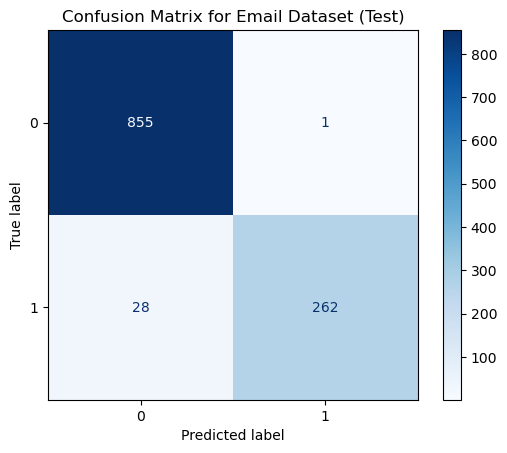

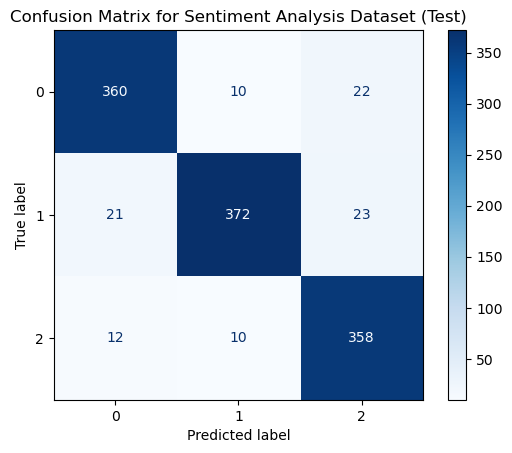

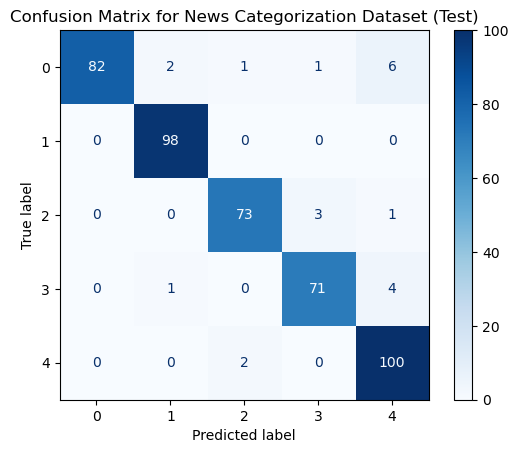

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and display confusion matrix for each dataset

# For Email Dataset
cm1 = confusion_matrix(y1_test, y1_test_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Email Dataset (Test)")
plt.show()

# For Sentiment Analysis Dataset
cm2 = confusion_matrix(y2_test, y2_test_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Sentiment Analysis Dataset (Test)")
plt.show()

# For News Categorization Dataset
cm3 = confusion_matrix(y3_test, y3_test_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for News Categorization Dataset (Test)")
plt.show()
